# RFM (Recency, Frequency, Monetary) Model

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import squarify
from datetime import timedelta

In [2]:
# Read dataset
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
# Convert InvoiceDate from object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
print(f'{df.shape[0]} rows; {df.shape[1]} columns')
print(f'{df[df.CustomerID.isnull()].shape[0]} transactions don\'t have a customer id')

print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))

541909 rows; 8 columns
135080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [6]:
# Drop NA values from online
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


The first we need to do is to sort customers based on recency, frequency, and monetary values. <br>
To calculate recency, we will be taking one day after the last invoice date of our data set as the snapshot date ‘2011–12–10 12:50:00’. <br>
The date difference will give us how recent the last transaction was made. With that, we can then group our dateframe by customer ID and assign it to ‘data_process’ for our data pre-processing.

In [7]:
# Create TotalSum column for online dataset
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [8]:
# Create snapshot date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [9]:
# Grouping by CustomerID
data_process = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [10]:
data_process

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [11]:
# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                             'InvoiceNo': 'Frequency',
                             'TotalSum': 'MonetaryValue'}, inplace=True)

In [12]:
data_process

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [13]:
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

4,372 rows; 3 columns


We have 4,372 customer records grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. Now we can get into the meat of things and use the .qcut() method to assign the relative percentile to their RFM features. But before that, let’s examine the distribution of our Recency, Frequency, and Monetary.

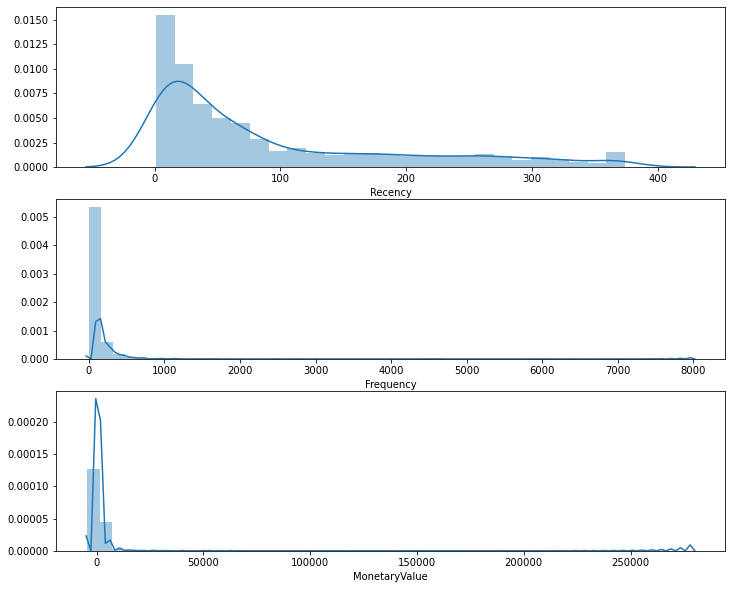

In [14]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])

# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles. <br><br>

However, when we examine our customer segmentation using K-Means, it is very important to ensure that we scale our data to center the mean and standard deviations.

# Calculate R and F groups

In [15]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1
...,...,...,...,...,...
18280.0,278,10,180.60,1,1
18281.0,181,7,80.82,1,1
18282.0,8,13,176.60,4,1


We create a 4 labels for our f_labels, where 4 is the “best” quantile. We do the same for our f_label. We then create new columns “R” and “F” and assign the r_group and f_group values to them respectively. <br><br>
Next, we do the same for our monetary value by grouping the values into 4 quantiles using .qcut() method.

In [16]:
# Create labels for MonetaryValue
m_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

# Create new column M
data_process = data_process.assign(M = m_groups.values)
data_process

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


Finally, with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below. Let’s assign our data_process dataframe to our newly created rfm dataframe.

In [17]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])

data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)

rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


From the output, we can see that we have our concatenated segments ready to be used for our segmentation, but there is one issue:

In [18]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

62


Having 62 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

# Summing the Score
One of the most straightforward methods is to sum our scores to a single number and define RFM levels for each score range.

In [19]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,13,176.60,4,1,1,4.01.01.0,6


We can get creative and hypothesize about what each score range entails, but for this exercise I will take inspiration from some common segment names.

In [20]:
# Define rfm_level function
def rfm_level(df):
    
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Require Activation
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Needs Attention


Finally, we can then group our customers by their RFM level:

In [21]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Loyal                 78.8      39.7         724.2   447
Needs Attention      174.5      13.9         227.1   391
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Require Activation   264.8       7.8         109.1   392


From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty!<br><br>
The other 40% will need some work. Let’s explore using some ads to re-target them:<br><br>
Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!<br><br>
Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.<br><br>
Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.<br><br>
Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

# Vizualization

In [22]:
rfm_level_agg.columns.droplevel()

Index(['mean', 'mean', 'mean', 'count'], dtype='object')

In [23]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

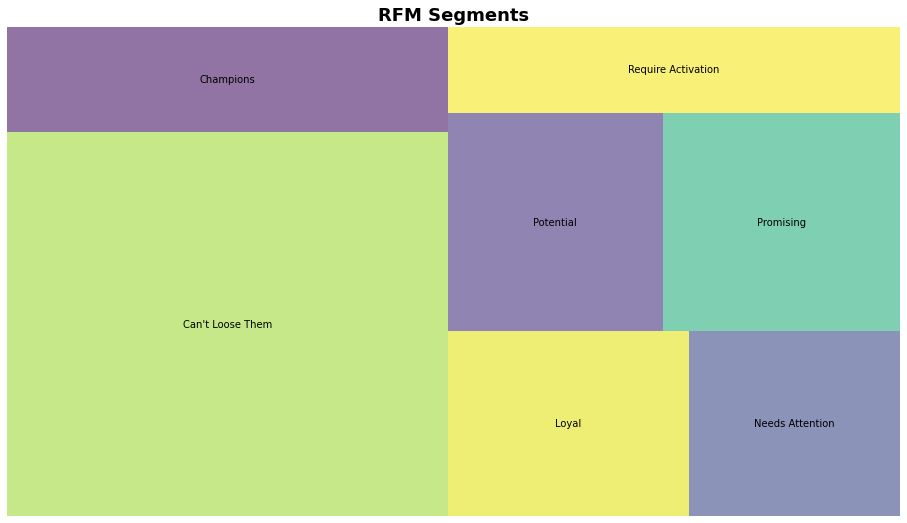

In [24]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()